In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


import warnings
warnings.filterwarnings("ignore")

In [4]:
data_base_path = './data'

test_data_path = os.path.join(data_base_path, 'Test.csv')
train_data_path = os.path.join(data_base_path, 'Train.csv')
submit_path = os.path.join(data_base_path, 'Sample_submission.csv')


data = pd.read_csv(train_data_path)


In [5]:
binary_features, categorical_features, single_value_features = [], [], []
for x in [col for col in data.columns if col not in ['feature_3','Class']]:
    number_of_categories = data[x].nunique()
    if number_of_categories==1:
        single_value_features.append(x)
    elif number_of_categories==2:
        binary_features.append(x)
    else:
        categorical_features.append(x)

In [6]:
len(binary_features) + len(single_value_features) + len(categorical_features) + 2 == data.shape[1]

True

In [7]:
len(binary_features)

1519

In [8]:
len(categorical_features)

2

In [9]:
len(single_value_features)

36

In [10]:
data[categorical_features].describe()

,feature_1,feature_2
count,1763.000000,1763.000000
mean,53.094158,126.587067
std,55.842014,129.859641
min,1.000000,1.000000
25%,12.000000,33.500000
50%,39.000000,96.000000
75%,75.000000,159.000000
max,640.000000,640.000000


<Axes: >

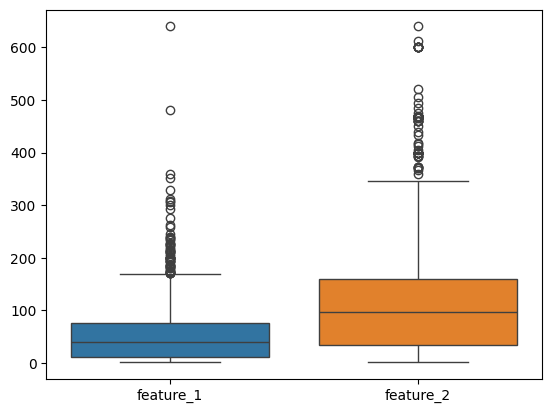

In [11]:
sns.boxplot(data = data[categorical_features])

In [12]:
continuous_features = categorical_features + ['feature_3']

In [13]:
data[single_value_features]

,feature_57,feature_82,feature_106,feature_147,feature_262,feature_278,feature_284,feature_320,feature_362,feature_372,...,feature_1038,feature_1063,feature_1096,feature_1185,feature_1211,feature_1243,feature_1247,feature_1341,feature_1367,feature_1407
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data = data.drop(single_value_features, axis=1)

In [15]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
duplicated_columns = []
for x in binary_features:
    x_feature_check_with_y = []
    for y in binary_features:
        if data[x].equals(data[y])==True:
            x_feature_check_with_y.append(1)
        else:
            x_feature_check_with_y.append(0)
    duplicated_columns.append(x_feature_check_with_y)

In [17]:
duplicated_columns = pd.DataFrame(duplicated_columns, columns=binary_features, index=binary_features)
duplicated_columns

,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
feature_4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feature_5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feature_6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feature_7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feature_8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_1554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
feature_1555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
feature_1556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
feature_1557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

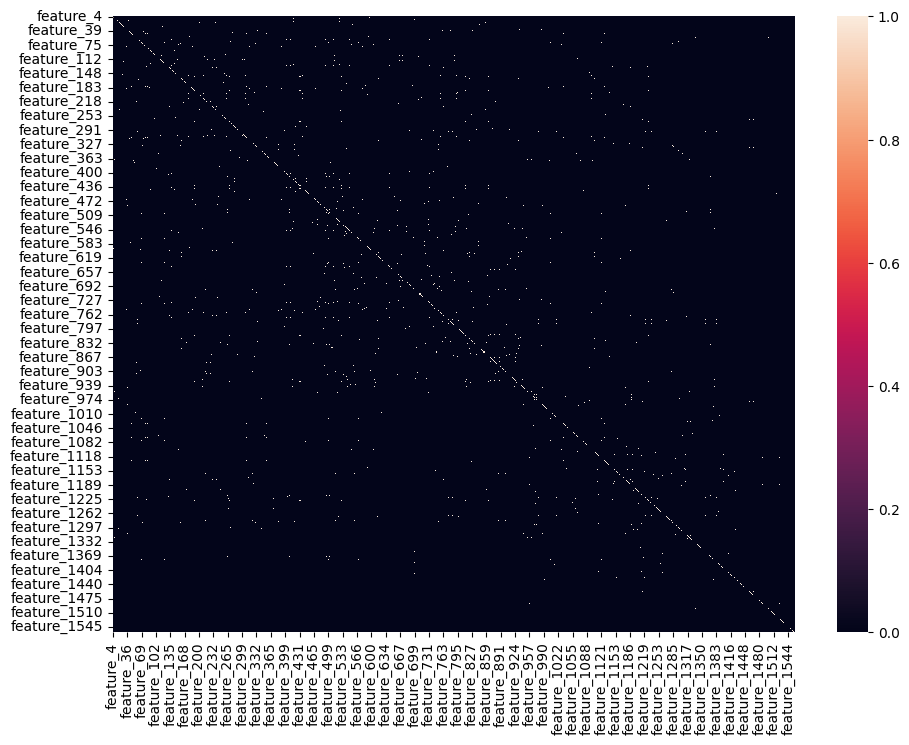

In [18]:
fig, ax = plt.subplots(1,1,figsize=(11,8))

sns.heatmap(duplicated_columns, ax=ax)

In [19]:
features_to_be_removed = []
i=0
while i<duplicated_columns.shape[0]:
    for j in range(i):
        if data[data.columns[i]].equals(data[data.columns[j]]):
            features_to_be_removed.append(data.columns[j])
    i+=1

In [20]:
pd.Series(features_to_be_removed).duplicated(keep=False)

0        True
1        True
2        True
3        True
4        True
        ...  
2708    False
2709     True
2710     True
2711     True
2712    False
Length: 2713, dtype: bool

In [21]:
which_to_be_dropped = pd.Series(features_to_be_removed).drop_duplicates(keep='first')
data = data.drop(which_to_be_dropped.values, axis=1)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_10,feature_13,feature_18,feature_21,feature_27,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data[data.duplicated(keep=False)==True]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_10,feature_13,feature_18,feature_21,feature_27,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
5,90,90,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,18,24,1.3333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,10,600,60.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1720,90,90,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,15,80,5.3333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1723,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data = data.drop_duplicates()
data.reset_index(inplace=True)
data = data.drop('index',axis=1)

In [24]:
binary_features = []
for x in [col for col in data.columns if col not in ['feature_1', 'feature_2', 'feature_3', 'Class']]:
    binary_features.append(x)

In [25]:
from sklearn.model_selection import train_test_split

X, y = data[binary_features], data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

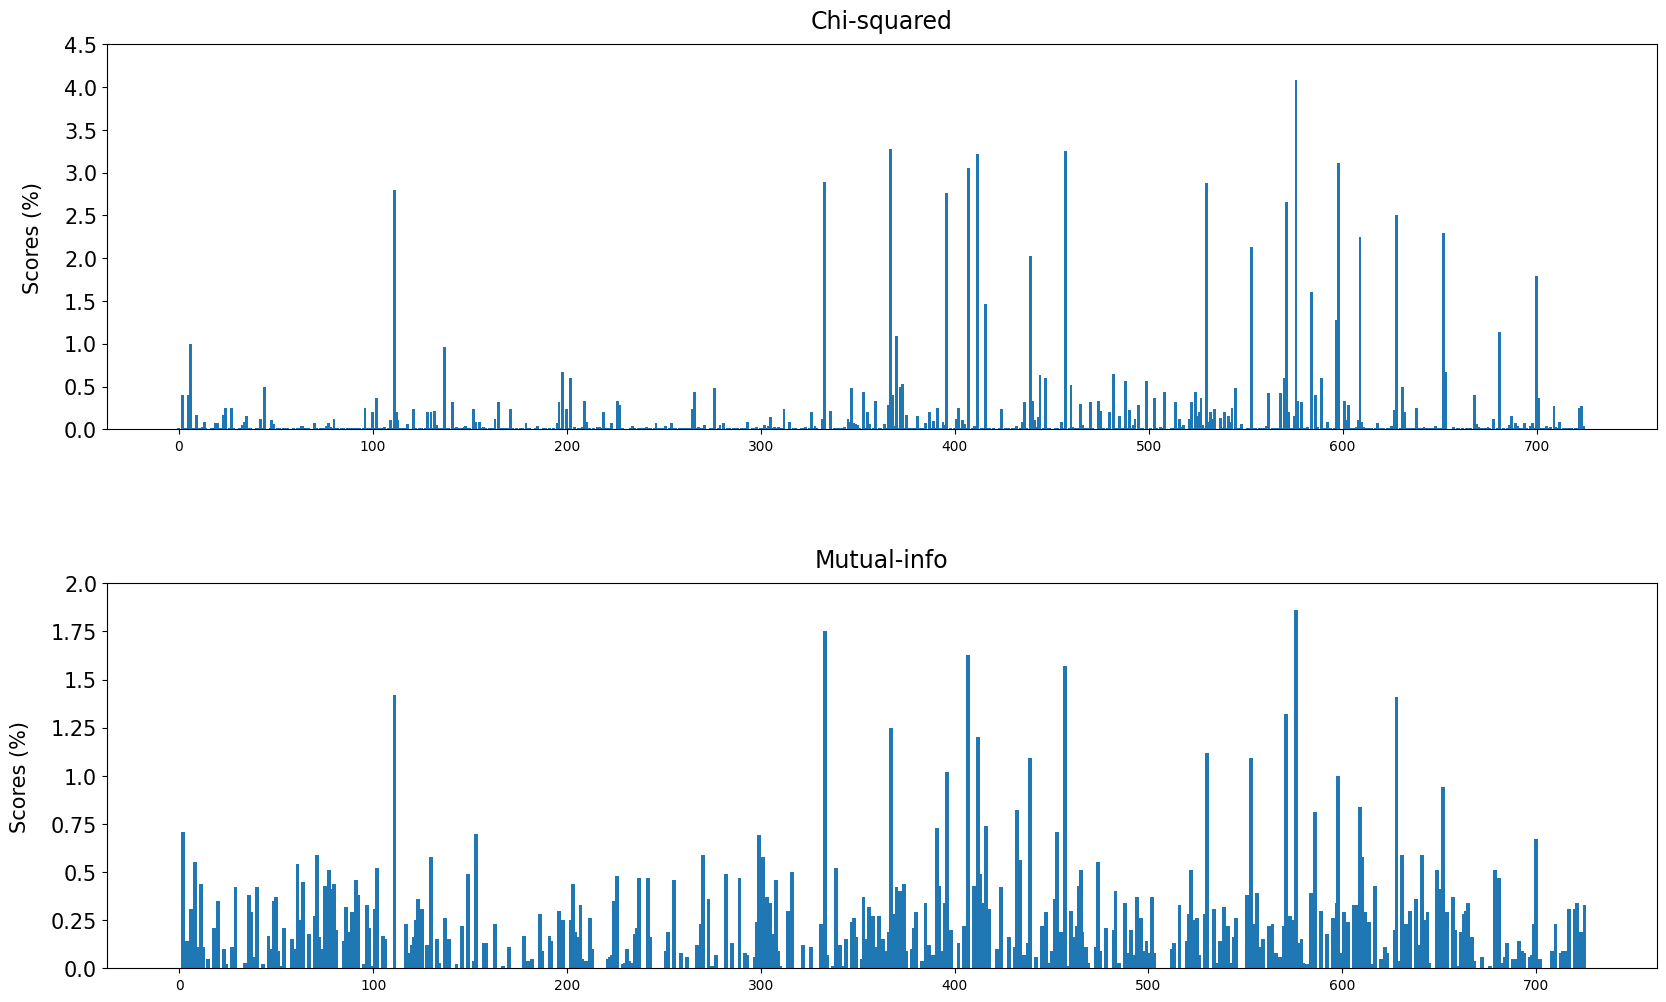

In [26]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

fs_chi = SelectKBest(score_func=chi2, k='all')
fs_chi.fit(X_train, y_train)

fs_mut = SelectKBest(score_func=mutual_info_classif, k='all')
fs_mut.fit(X_train, y_train)

# check the scores function for nan values and replace to 0
fs_chi.scores_[np.isnan(fs_chi.scores_)]=0
fs_mut.scores_[np.isnan(fs_mut.scores_)]=0

#calculate the scores
scores_chi = np.around((fs_chi.scores_/fs_chi.scores_.sum())*100,2)
scores_mut = np.around((fs_mut.scores_/fs_mut.scores_.sum())*100,2)

##########################################################################################
##########################################################################################

fig, ax = plt.subplots(2,1,figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

position = np.arange(len(fs_chi.scores_))


ax[0].bar(position, scores_chi, width=1.5)
ax[0].set_yticks(ax[0].get_yticks())
ax[0].set_yticklabels(np.around(ax[0].get_yticks(),2), fontsize=15)
ax[0].set_ylabel("Scores (%)", labelpad=15, fontsize=15)
ax[0].set_title("Chi-squared", y=1.02, fontsize=17)


ax[1].bar(position, scores_mut, width=2)
ax[1].set_yticks(ax[1].get_yticks())
ax[1].set_yticklabels(np.around(ax[1].get_yticks(),2), fontsize=15)
ax[1].set_ylabel("Scores (%)", labelpad=15, fontsize=15)
ax[1].set_title("Mutual-info", y=1.02, fontsize=17)

plt.show()

In [27]:
data.columns[np.where(scores_chi>=1)]

Index(['feature_13', 'feature_345', 'feature_954', 'feature_1044',
       'feature_1048', 'feature_1110', 'feature_1137', 'feature_1149',
       'feature_1156', 'feature_1204', 'feature_1240', 'feature_1342',
       'feature_1370', 'feature_1392', 'feature_1397', 'feature_1405',
       'feature_1419', 'feature_1420', 'feature_1433', 'feature_1453',
       'feature_1481', 'feature_1511', 'feature_1530'],
      dtype='object')

In [28]:
data.columns[np.where(scores_mut>=1)]

Index(['feature_345', 'feature_954', 'feature_1044', 'feature_1110',
       'feature_1137', 'feature_1149', 'feature_1204', 'feature_1240',
       'feature_1342', 'feature_1370', 'feature_1392', 'feature_1397',
       'feature_1420', 'feature_1453'],
      dtype='object')

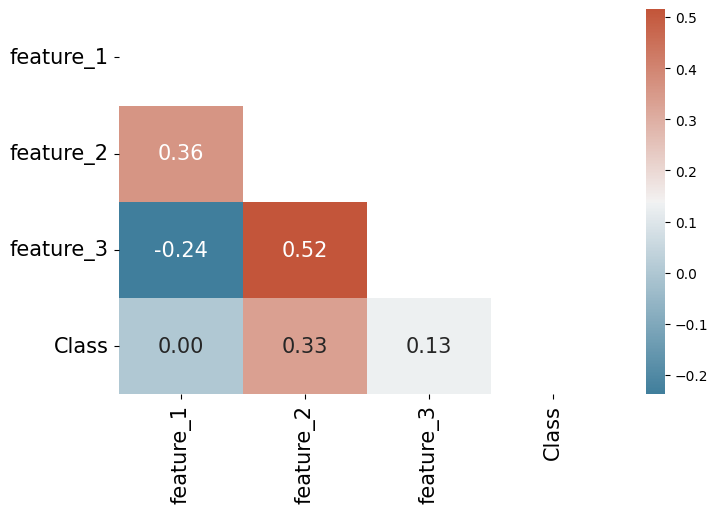

In [29]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

mask = np.triu(np.ones_like(data[continuous_features + ['Class']].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data[continuous_features + ['Class']].corr(), annot=True, fmt='.2f', 
            mask=mask, cmap=cmap, annot_kws={'size': 15}, ax=ax)

ax.set_xticks([0.5,1.5,2.5,3.5])
ax.set_xticklabels(continuous_features + ['Class'], fontsize=15, rotation=90)
ax.set_yticks([0.5,1.5,2.5,3.5])
ax.set_yticklabels(continuous_features + ['Class'], fontsize=15, rotation=360);

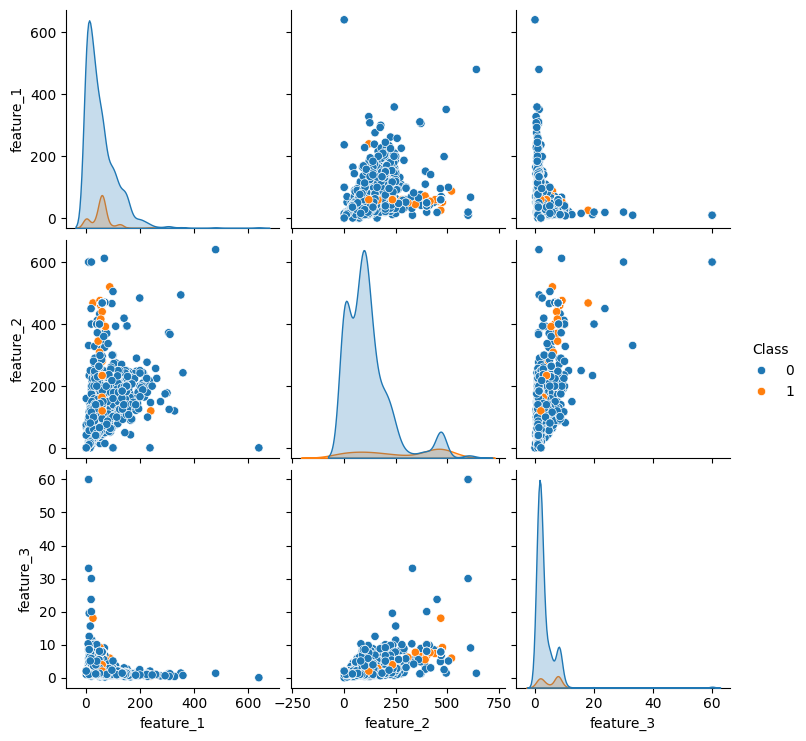

In [30]:
sns.pairplot(data[continuous_features + ['Class']], hue='Class');

In [31]:
data_for_predictions = data[continuous_features + data.columns[np.where(scores_chi>=1)].tolist() + ['Class']]

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
mm = MinMaxScaler()

for col in data_for_predictions.columns[:3]:
    ss.fit(data_for_predictions[col].to_numpy().reshape(-1,1))
    data_for_predictions[col] = ss.transform(data_for_predictions[col].to_numpy().reshape(-1,1))
    data_for_predictions[col] = mm.fit_transform(data_for_predictions[col].to_numpy().reshape(-1,1)).reshape(1,-1)[0]

C:\Users\kim_h\AppData\Local\Temp\ipykernel_10776\3644616183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_predictions[col] = ss.transform(data_for_predictions[col].to_numpy().reshape(-1,1))
C:\Users\kim_h\AppData\Local\Temp\ipykernel_10776\3644616183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_predictions[col] = mm.fit_transform(data_for_predictions[col].to_numpy().reshape(-1,1)).reshape(1,-1)[0]
C:\Users\kim_h\AppData\Local\Temp\ipykernel_10776\3644616183.py:8: SettingWithC

In [33]:
data_for_predictions.head()

,feature_1,feature_2,feature_3,feature_13,feature_345,feature_954,feature_1044,feature_1048,feature_1110,feature_1137,...,feature_1397,feature_1405,feature_1419,feature_1420,feature_1433,feature_1453,feature_1481,feature_1511,feature_1530,Class
0,0.154930,0.248826,0.026642,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.029734,0.128326,0.069143,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.153365,0.233177,0.025227,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.061033,0.061033,0.016642,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.017214,0.364632,0.324983,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data_for_predictions.describe()

,feature_1,feature_2,feature_3,feature_13,feature_345,feature_954,feature_1044,feature_1048,feature_1110,feature_1137,...,feature_1397,feature_1405,feature_1419,feature_1420,feature_1433,feature_1453,feature_1481,feature_1511,feature_1530,Class
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,...,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,0.082927,0.199143,0.056078,0.006414,0.005831,0.009913,0.033236,0.033819,0.005248,0.165598,...,0.003499,0.005248,0.006414,0.003499,0.009329,0.006997,0.005248,0.005248,0.020991,0.083382
std,0.087919,0.202000,0.066147,0.079853,0.076160,0.099096,0.179305,0.180816,0.072273,0.371828,...,0.059062,0.072273,0.079853,0.059062,0.096165,0.083380,0.072273,0.072273,0.143397,0.276539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.017214,0.061033,0.020809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.061033,0.151800,0.033309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.116588,0.250391,0.076771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
X, y = data_for_predictions.iloc[:,:-1], data_for_predictions.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

#model selection
from sklearn.model_selection import GridSearchCV, cross_val_score

#metrics
from sklearn.metrics import confusion_matrix, roc_curve

In [37]:
parameters = {'penalty':['l1','l2'],
              'C': [0.001, 0.01, 0.1, 1]}
# Logistic Regression
GD_LR = GridSearchCV(LogisticRegression(solver='liblinear'),
                        param_grid=parameters, 
                        scoring='f1')

#Decision Trees
parameters = {'max_leaf_nodes': [i for i in range(2,10)],
              'max_depth': [i for i in range(2,10)]}
    
GD_DT = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Extra Trees
GD_ET = GridSearchCV(ExtraTreesClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Random Forest
GD_RF = GridSearchCV(RandomForestClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Gradient Boosting
GD_GB = GridSearchCV(GradientBoostingClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#k-NN
parameters = {'n_neighbors': [i for i in range(5,35,5)]}
GD_kNN = GridSearchCV(KNeighborsClassifier(),
                      param_grid=parameters, 
                      scoring='f1')


models = {'Logistic_Regression': GD_LR,
          'kNN': GD_kNN,
          'Decision_Trees': GD_DT,
          'Extra_Trees': GD_ET,
          'Random_Forest': GD_RF,
          'Gradient_Boosting': GD_GB}

In [39]:
results_col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC', 'F1-score']
results = pd.DataFrame(columns=results_col)

l = 0

accuracy_models_opt, precision_models_opt, recall_models_opt = [], [], []
roc_auc_models_opt, f1_score_models_opt = [], []
best_estimator = {}

for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    
    accuracy = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='accuracy')
    accuracy_models_opt.append(accuracy)    
    precision = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='precision')
    precision_models_opt.append(precision)
    recall = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='recall')
    recall_models_opt.append(recall)
    roc_auc = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='roc_auc')
    roc_auc_models_opt.append(roc_auc)
    f1 = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='f1')
    f1_score_models_opt.append(roc_auc)
    
    best_estimator[name] = model.best_estimator_
    
    results.loc[l] = [name,
                      '%s $\pm$ %s' %(round(accuracy.mean()*100,2),round(accuracy.std()*100,2)),
                      '%s $\pm$ %s' %(round(precision.mean()*100,2),round(precision.std()*100,2)),
                      '%s $\pm$ %s' %(round(recall.mean()*100,2),round(recall.std()*100,2)),
                      '%s $\pm$ %s' %(round(roc_auc.mean()*100,2),round(roc_auc.std()*100,2)),
                      '%s $\pm$ %s' %(round(f1.mean()*100,2),round(f1.std()*100,2))]
    l += 1

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting


In [40]:
results

,Classifier,Accuracy,Precision,Recall,ROC-AUC,F1-score
0,Logistic_Regression,91.43 $\pm$ 0.98,47.54 $\pm$ 14.86,18.95 $\pm$ 7.96,82.68 $\pm$ 6.54,26.46 $\pm$ 9.63
1,kNN,91.6 $\pm$ 1.25,50.43 $\pm$ 6.86,44.05 $\pm$ 11.34,85.49 $\pm$ 5.53,46.1 $\pm$ 7.99
2,Decision_Trees,89.45 $\pm$ 1.99,41.85 $\pm$ 7.83,65.05 $\pm$ 10.21,79.18 $\pm$ 4.64,50.78 $\pm$ 8.45
3,Extra_Trees,89.97 $\pm$ 1.46,45.86 $\pm$ 7.55,69.19 $\pm$ 12.28,84.12 $\pm$ 5.77,54.88 $\pm$ 7.76
4,Random_Forest,89.91 $\pm$ 1.88,42.55 $\pm$ 6.98,66.38 $\pm$ 12.04,88.56 $\pm$ 4.39,53.52 $\pm$ 8.67
5,Gradient_Boosting,92.48 $\pm$ 1.15,63.14 $\pm$ 18.39,30.05 $\pm$ 9.72,87.61 $\pm$ 5.0,40.35 $\pm$ 9.91


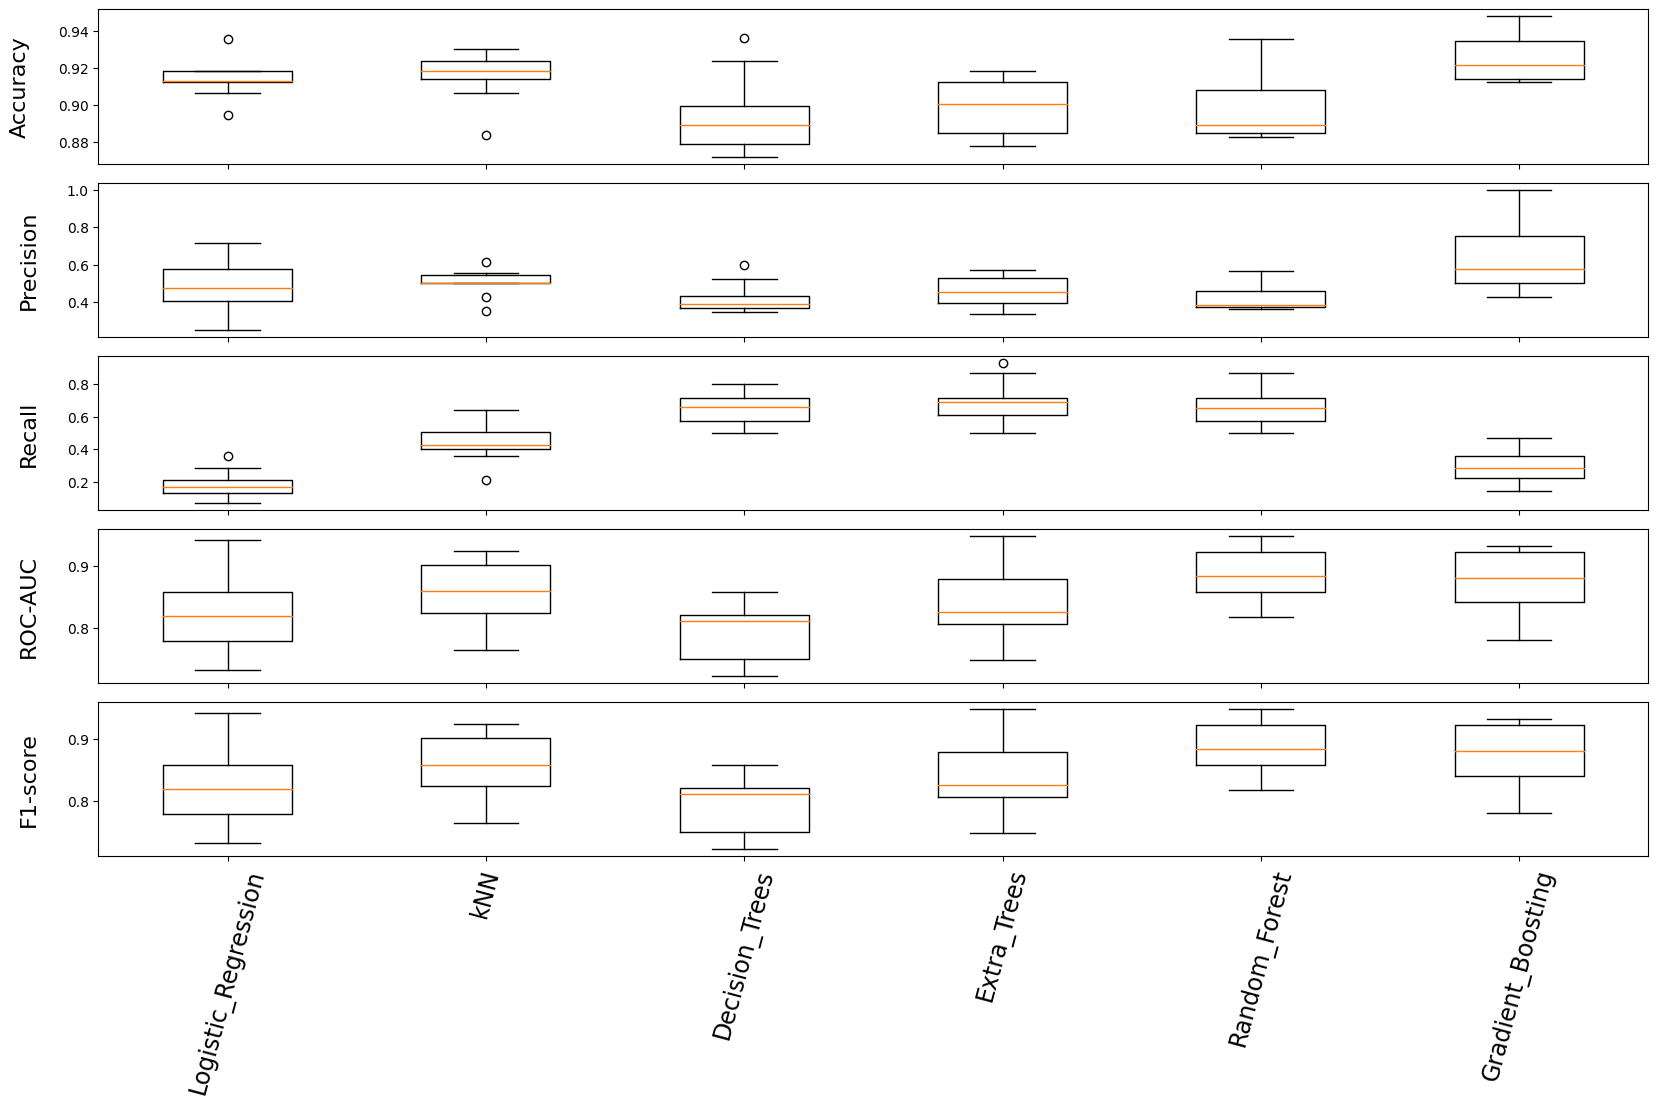

In [41]:
fig, ax = plt.subplots(5, 1, figsize=(20,11))
plt.subplots_adjust(hspace=0.12)

ax[0].boxplot(accuracy_models_opt)
ax[1].boxplot(precision_models_opt)
ax[2].boxplot(recall_models_opt)
ax[3].boxplot(roc_auc_models_opt)
ax[4].boxplot(f1_score_models_opt)

ax[0].set_ylabel('Accuracy', labelpad=20, fontsize=16)
ax[1].set_ylabel('Precision', labelpad=20, fontsize=16)
ax[2].set_ylabel('Recall', labelpad=20, fontsize=16)
ax[3].set_ylabel('ROC-AUC', labelpad=20, fontsize=16)
ax[4].set_ylabel('F1-score', labelpad=20, fontsize=16)

xticks = np.arange(1,7)
for i in range(len(ax)):
    if i==4:
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(models.keys(), fontsize=17, rotation=75)
    else:
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels('');

In [42]:
metrics_used = ['Accuracy', 'Precision', 'Recall', 'F1-score']

specific_models = []

for x in metrics_used:
    which_algorith = results.sort_values(x, ascending=False).iloc[0,0]
    if x!='Accuracy':
        if which_algorith in specific_models:
            i=1
            while which_algorith in specific_models:
                which_algorith = results.sort_values(x, ascending=False).iloc[i,0]
                if which_algorith in specific_models:
                    i+=1
                else:
                    specific_models.append(which_algorith)
                    break
        else:
            specific_models.append(which_algorith)
    else:
        specific_models.append(which_algorith)
        

specific_models

['Gradient_Boosting', 'kNN', 'Extra_Trees', 'Random_Forest']

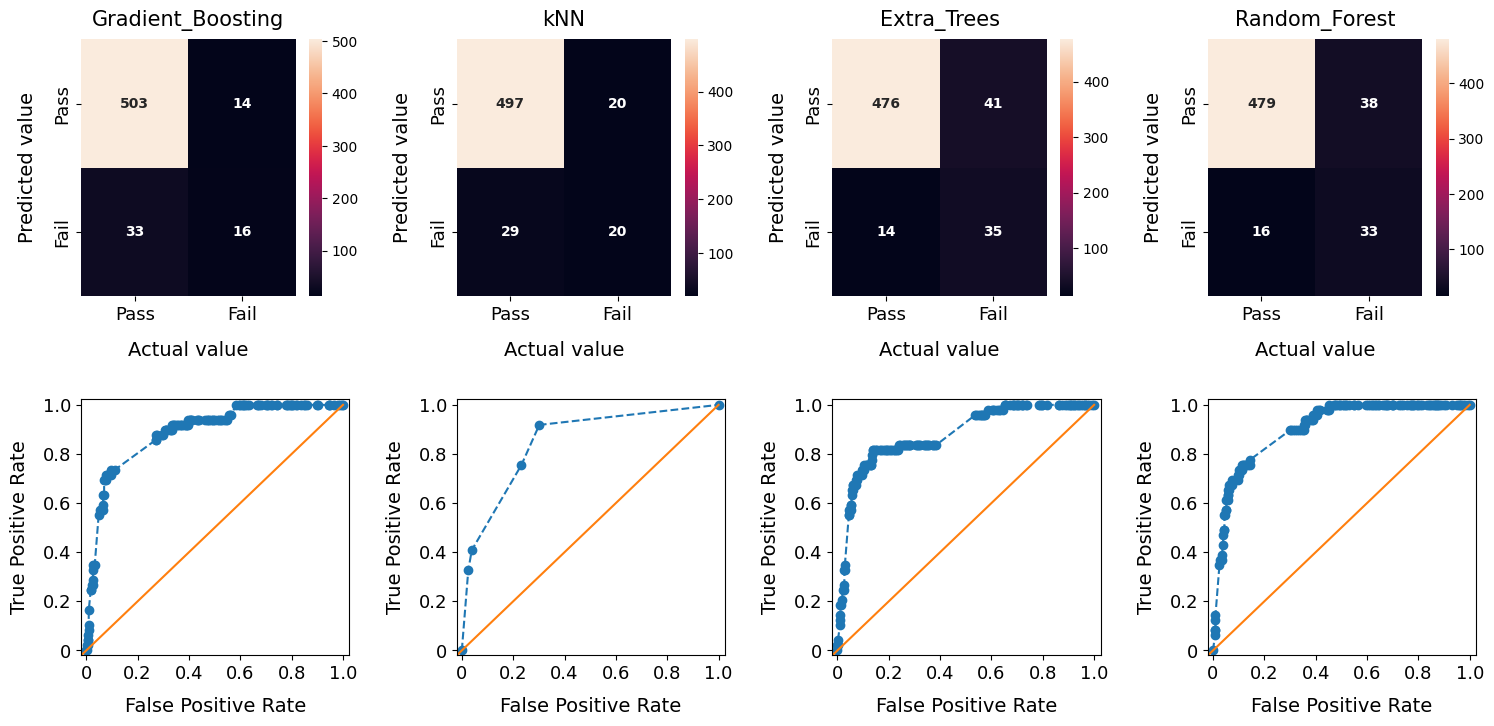

In [43]:
fig, ax = plt.subplots(2, 4, figsize=(18,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                         Confusion Matrix                                            #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################

i = 0
for name in specific_models:
    y_pred = models[name].best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)

    sns.heatmap(cm, annot=True, annot_kws={"size": 10, "weight": "bold"}, fmt='g', ax=ax[0,i])
    
    ticks=['Pass', 'Fail']
    ax[0,i].set_yticklabels(ticks, fontsize=13)
    ax[0,i].set_xticklabels(ticks, fontsize=13)
    ax[0,i].set_xlabel('Actual value', labelpad=12, fontsize=14)
    ax[0,i].set_ylabel('Predicted value', labelpad=12, fontsize=14)
    
    ax[0,i].set_title(specific_models[i], y=1.02, fontsize=15)
    i+=1

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                           ROC curve                                                 #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################


i = 0
for name in specific_models:
    probs = models[name].best_estimator_.predict_proba(X_test) 
    probs = probs[:, 1] 
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, probs)
    
    ax[1,i].plot(rf_fpr, rf_tpr, '--o')
    ax[1,i].plot([-0.02,1.],[-0.02,1.], '-')
    
    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    ax[1,i].set_xticks(ticks)
    ax[1,i].set_xticklabels(ticks, fontsize=13)

    ax[1,i].set_yticks(ticks)
    ax[1,i].set_yticklabels(ticks, fontsize=13)

    ax[1,i].set_xlim(-0.02,1.025)
    ax[1,i].set_ylim(-0.02,1.025)

    ax[1,i].set_xlabel('False Positive Rate', fontsize=14, labelpad=10)
    ax[1,i].set_ylabel('True Positive Rate', fontsize=14, labelpad=10)
    
    i+=1;

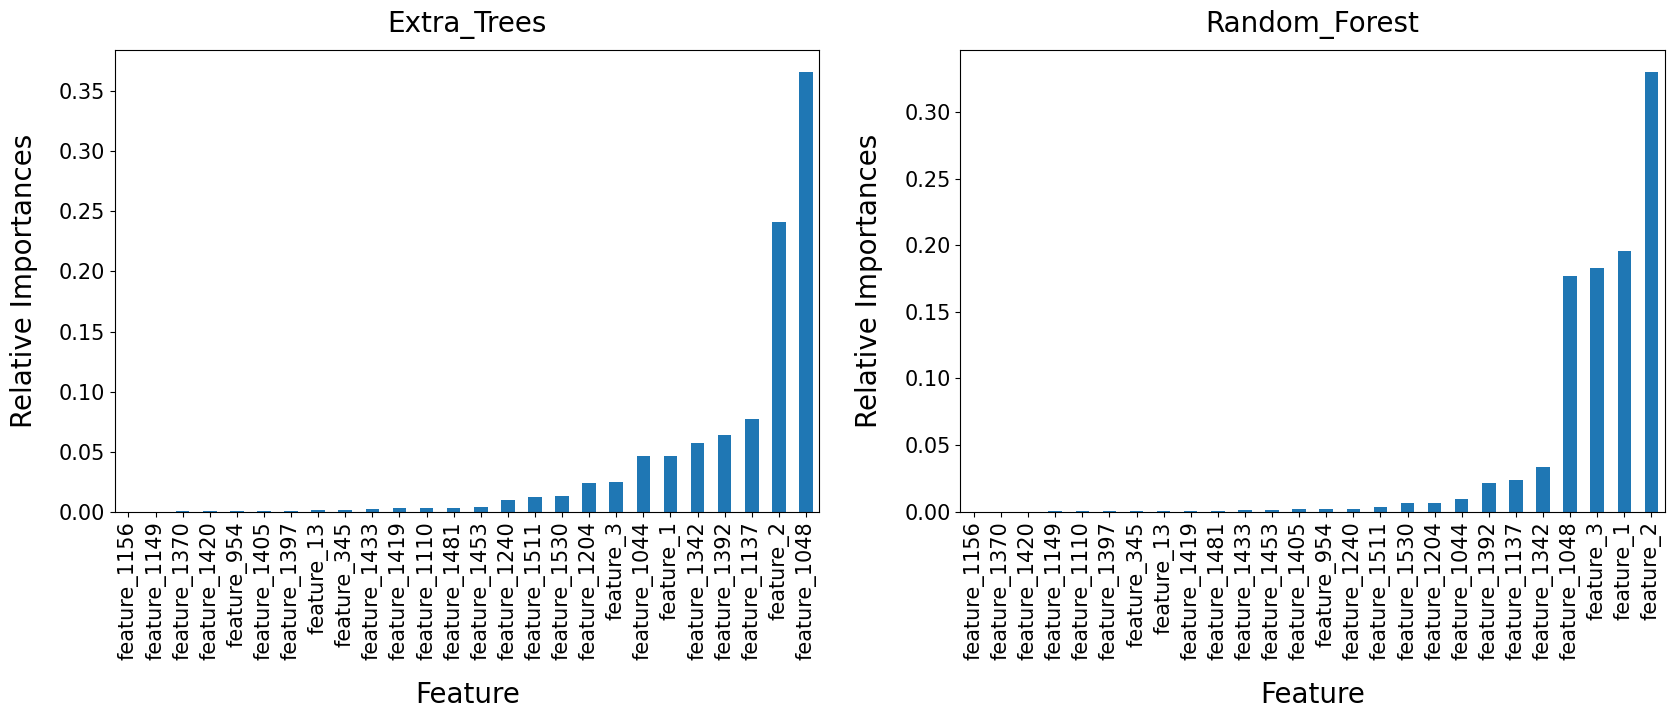

In [44]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

for i, name in enumerate(['Extra_Trees','Random_Forest']):
    best_model = models[name].best_estimator_
    feature_importances = pd.Series(best_model.feature_importances_,
                                    data_for_predictions.columns[:-1]).sort_values(ascending=True)

    feature_importances.plot(kind='bar', fontsize=15, ax=ax[i])
    ax[i].set_xlabel('Feature', labelpad=15, fontsize=20)
    ax[i].set_ylabel('Relative Importances', labelpad=15, fontsize=20)
    ax[i].set_title(name, y=1.02, fontsize=20);

In [45]:
which_algorithm = results[results['F1-score']==results['F1-score'].max()]['Classifier']
best_model_method_1 = best_estimator[which_algorithm.values[0]]

results[results['F1-score']==results['F1-score'].max()]

,Classifier,Accuracy,Precision,Recall,ROC-AUC,F1-score
3,Extra_Trees,89.97 $\pm$ 1.46,45.86 $\pm$ 7.55,69.19 $\pm$ 12.28,84.12 $\pm$ 5.77,54.88 $\pm$ 7.76


In [46]:
parameters = {'max_leaf_nodes': [i for i in range(2,10)],
              'max_depth': [i for i in range(2,10)]}
    
#Extra Trees
GD_ET = GridSearchCV(ExtraTreesClassifier(),
                     param_grid=parameters, 
                     scoring='f1')


GD_ET.fit(X_train,y_train)
model_without_weights = GD_ET.best_estimator_

In [47]:
data_method_predictions = data_for_predictions.copy()

In [48]:
predictions_without_weights = model_without_weights.predict(X)
data_method_predictions["Pred. without weights"] = predictions_without_weights

predictions_method_1 = best_model_method_1.predict(X)
data_method_predictions["Pred. Method 1"] = predictions_method_1

In [49]:
from sklearn.metrics import classification_report

print('Using the principle of method 1')
print()
print(classification_report(data_method_predictions.Class,data_method_predictions["Pred. Method 1"]))
print('-'*60)
print('-'*60)
print()
print('Best estimator of method 1 without weights')
print()
print(classification_report(data_method_predictions.Class,data_method_predictions["Pred. without weights"]))

Using the principle of method 1

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1572
           1       0.47      0.71      0.56       143

    accuracy                           0.91      1715
   macro avg       0.72      0.82      0.76      1715
weighted avg       0.93      0.91      0.92      1715

------------------------------------------------------------
------------------------------------------------------------

Best estimator of method 1 without weights

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1572
           1       0.63      0.15      0.25       143

    accuracy                           0.92      1715
   macro avg       0.78      0.57      0.60      1715
weighted avg       0.90      0.92      0.90      1715



In [50]:
parameters = {'penalty':['l1','l2'],
              'C': [0.001, 0.01, 0.1, 1]}
# Logistic Regression
GD_LR = GridSearchCV(LogisticRegression(solver='liblinear'),
                        param_grid=parameters, 
                        scoring='f1')

#Decision Trees
parameters = {'max_leaf_nodes': [i for i in range(2,10)],
              'max_depth': [i for i in range(2,10)]}
    
GD_DT = GridSearchCV(DecisionTreeClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#Extra Trees
GD_ET = GridSearchCV(ExtraTreesClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#Random Forest
GD_RF = GridSearchCV(RandomForestClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#Gradient Boosting
GD_GB = GridSearchCV(GradientBoostingClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#k-NN
parameters = {'n_neighbors': [i for i in range(5,35,5)]}
GD_kNN = GridSearchCV(KNeighborsClassifier(),
                      param_grid=parameters, 
                      scoring='f1')


models = {'Logistic_Regression': GD_LR,
          'kNN': GD_kNN,
          'Decision_Trees': GD_DT,
          'Extra_Trees': GD_ET,
          'Random_Forest': GD_RF,
          'Gradient_Boosting': GD_GB}

In [51]:
import random

size = [1,1.5,2,2.5,3,3.5,5,7.5,10]

accuracy_per_size, precision_per_size, recall_per_size = [], [], []
roc_auc_per_size, f1_per_size = [], []
best_estimator_per_size = []

experiment, classes_size = [], []

print('-'*35)
for s in size:
    print('Class Pass ->', s, ': 1 <- Class Fail')
    print()
    ind_class_1 = data_for_predictions[data_for_predictions.Class==1].index.tolist()
    ind_class_0 = random.choices(data_for_predictions[data_for_predictions.Class==0].index, k=int(s*len(ind_class_1)))
    which_ind = ind_class_1 + ind_class_0
    
    random.shuffle(which_ind)
    
    X, y = data_for_predictions.iloc[which_ind,:-1], data_for_predictions.iloc[which_ind,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    classes_size.append(round((y.value_counts()/y.count())*100,2).values)
    
    results_col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC', 'F1-score']
    results = pd.DataFrame(columns=results_col)

    l = 0

    accuracy_models_opt, precision_models_opt, recall_models_opt = [], [], []
    roc_auc_models_opt, f1_score_models_opt = [], []
    best_estimator = []
    
    for name, model in models.items():
        print(name)
        model.fit(X_train,y_train)
        
        best_estimator.append(model.best_estimator_)
    
        accuracy = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='accuracy')
        accuracy_models_opt.append(accuracy)    
        precision = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='precision')
        precision_models_opt.append(precision)
        recall = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='recall')
        recall_models_opt.append(recall)
        roc_auc = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='roc_auc')
        roc_auc_models_opt.append(roc_auc)
        f1 = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='f1')
        f1_score_models_opt.append(roc_auc)
    
        results.loc[l] = [name,
                          '%s $\pm$ %s' %(round(accuracy.mean()*100,2),round(accuracy.std()*100,2)),
                          '%s $\pm$ %s' %(round(precision.mean()*100,2),round(precision.std()*100,2)),
                          '%s $\pm$ %s' %(round(recall.mean()*100,2),round(recall.std()*100,2)),
                          '%s $\pm$ %s' %(round(roc_auc.mean()*100,2),round(roc_auc.std()*100,2)),
                          '%s $\pm$ %s' %(round(f1.mean()*100,2),round(f1.std()*100,2))]
        l += 1
        
    experiment.append(results)
    
    best_estimator_per_size.append(best_estimator)
    
    accuracy_per_size.append(accuracy_models_opt)
    precision_per_size.append(precision_models_opt)
    recall_per_size.append(recall_models_opt)
    roc_auc_per_size.append(roc_auc_models_opt)
    f1_per_size.append(f1_score_models_opt)
    
    print('-'*35)

-----------------------------------
Class Pass -> 1 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 1.5 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 2 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 2.5 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 3 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 3.5 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 5 : 1 <- Class Fail


In [52]:
j = 0
for name, _ in models.items():
    results_per_classifier = []
    for i in range(len(experiment)):
        results_per_classifier.append([size[i],classes_size[i][0],classes_size[i][1],
                                       round(accuracy_per_size[i][j].mean()*100,2),
                                       round(precision_per_size[i][j].mean()*100,2),
                                       round(recall_per_size[i][j].mean()*100,2),
                                       round(roc_auc_per_size[i][j].mean()*100,2),
                                       round(f1_per_size[i][j].mean()*100,2)])
        
    globals()[f"{name}_results"] = pd.DataFrame(results_per_classifier, columns=['Ratio Pass:Fail','Percentage Pass',
                                                                                 'Percentage Fail','Accuracy',
                                                                                 'Precision','Recall','ROC-AUC',
                                                                                 'F1-score'])
    j+=1

In [53]:
algorithms_results = {'Logistic Regression': Logistic_Regression_results, 
                      'kNN': kNN_results, 
                      'Decision_Trees': Decision_Trees_results,
                      'Extra_Trees': Extra_Trees_results, 
                      'Random_Forest': Random_Forest_results, 
                      'Gradient_Boosting': Gradient_Boosting_results}

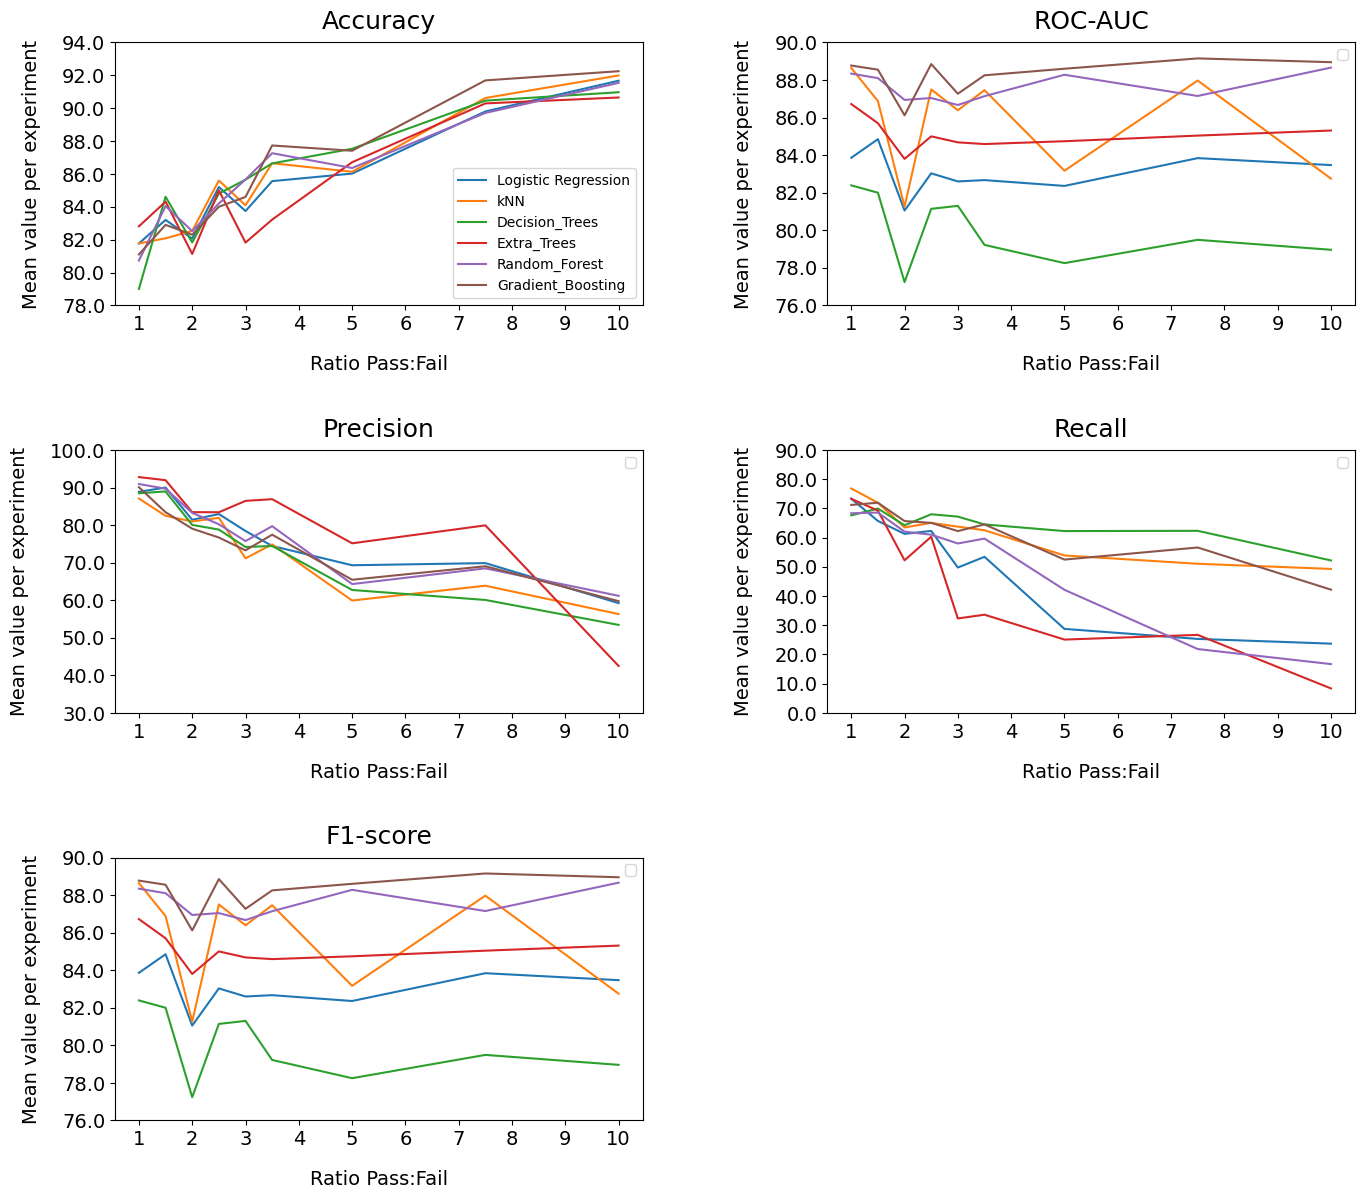

In [54]:
fig, ax = plt.subplots(3,2,figsize=(16,14))
plt.subplots_adjust(wspace=0.35,hspace=0.55)
ax[2,1].axis('off')

for algorithm_name, results in algorithms_results.items():
    results.plot(x='Ratio Pass:Fail',y='Accuracy', ax=ax[0,0], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='ROC-AUC', ax=ax[0,1], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='Precision', ax=ax[1,0], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='Recall', ax=ax[1,1], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='F1-score', ax=ax[2,0], label=algorithm_name)
    
ax[0,0].set_title('Accuracy', y=1.02, fontsize=18)
ax[0,1].set_title('ROC-AUC', y=1.02, fontsize=18)
ax[1,0].set_title('Precision', y=1.02, fontsize=18)
ax[1,1].set_title('Recall', y=1.02, fontsize=18)
ax[2,0].set_title('F1-score', y=1.02, fontsize=18)


x_ticks = [x for x in range(1,11)]
for i in range(3):
    for j in range(2):
        ax[i,j].set_xticks(x_ticks)
        ax[i,j].set_xticklabels(x_ticks, fontsize=14)
        ax[i,j].set_xlabel('Ratio Pass:Fail', labelpad=15, fontsize=14)
        ax[i,j].set_ylabel('Mean value per experiment', labelpad=15, fontsize=14)
        
        y_ticks = ax[i,j].get_yticks()
        ax[i,j].set_yticks(y_ticks)
        ax[i,j].set_yticklabels(y_ticks, fontsize=14)
        
        
ax[0,1].legend('')
ax[1,0].legend('')
ax[1,1].legend('')
ax[2,0].legend('');

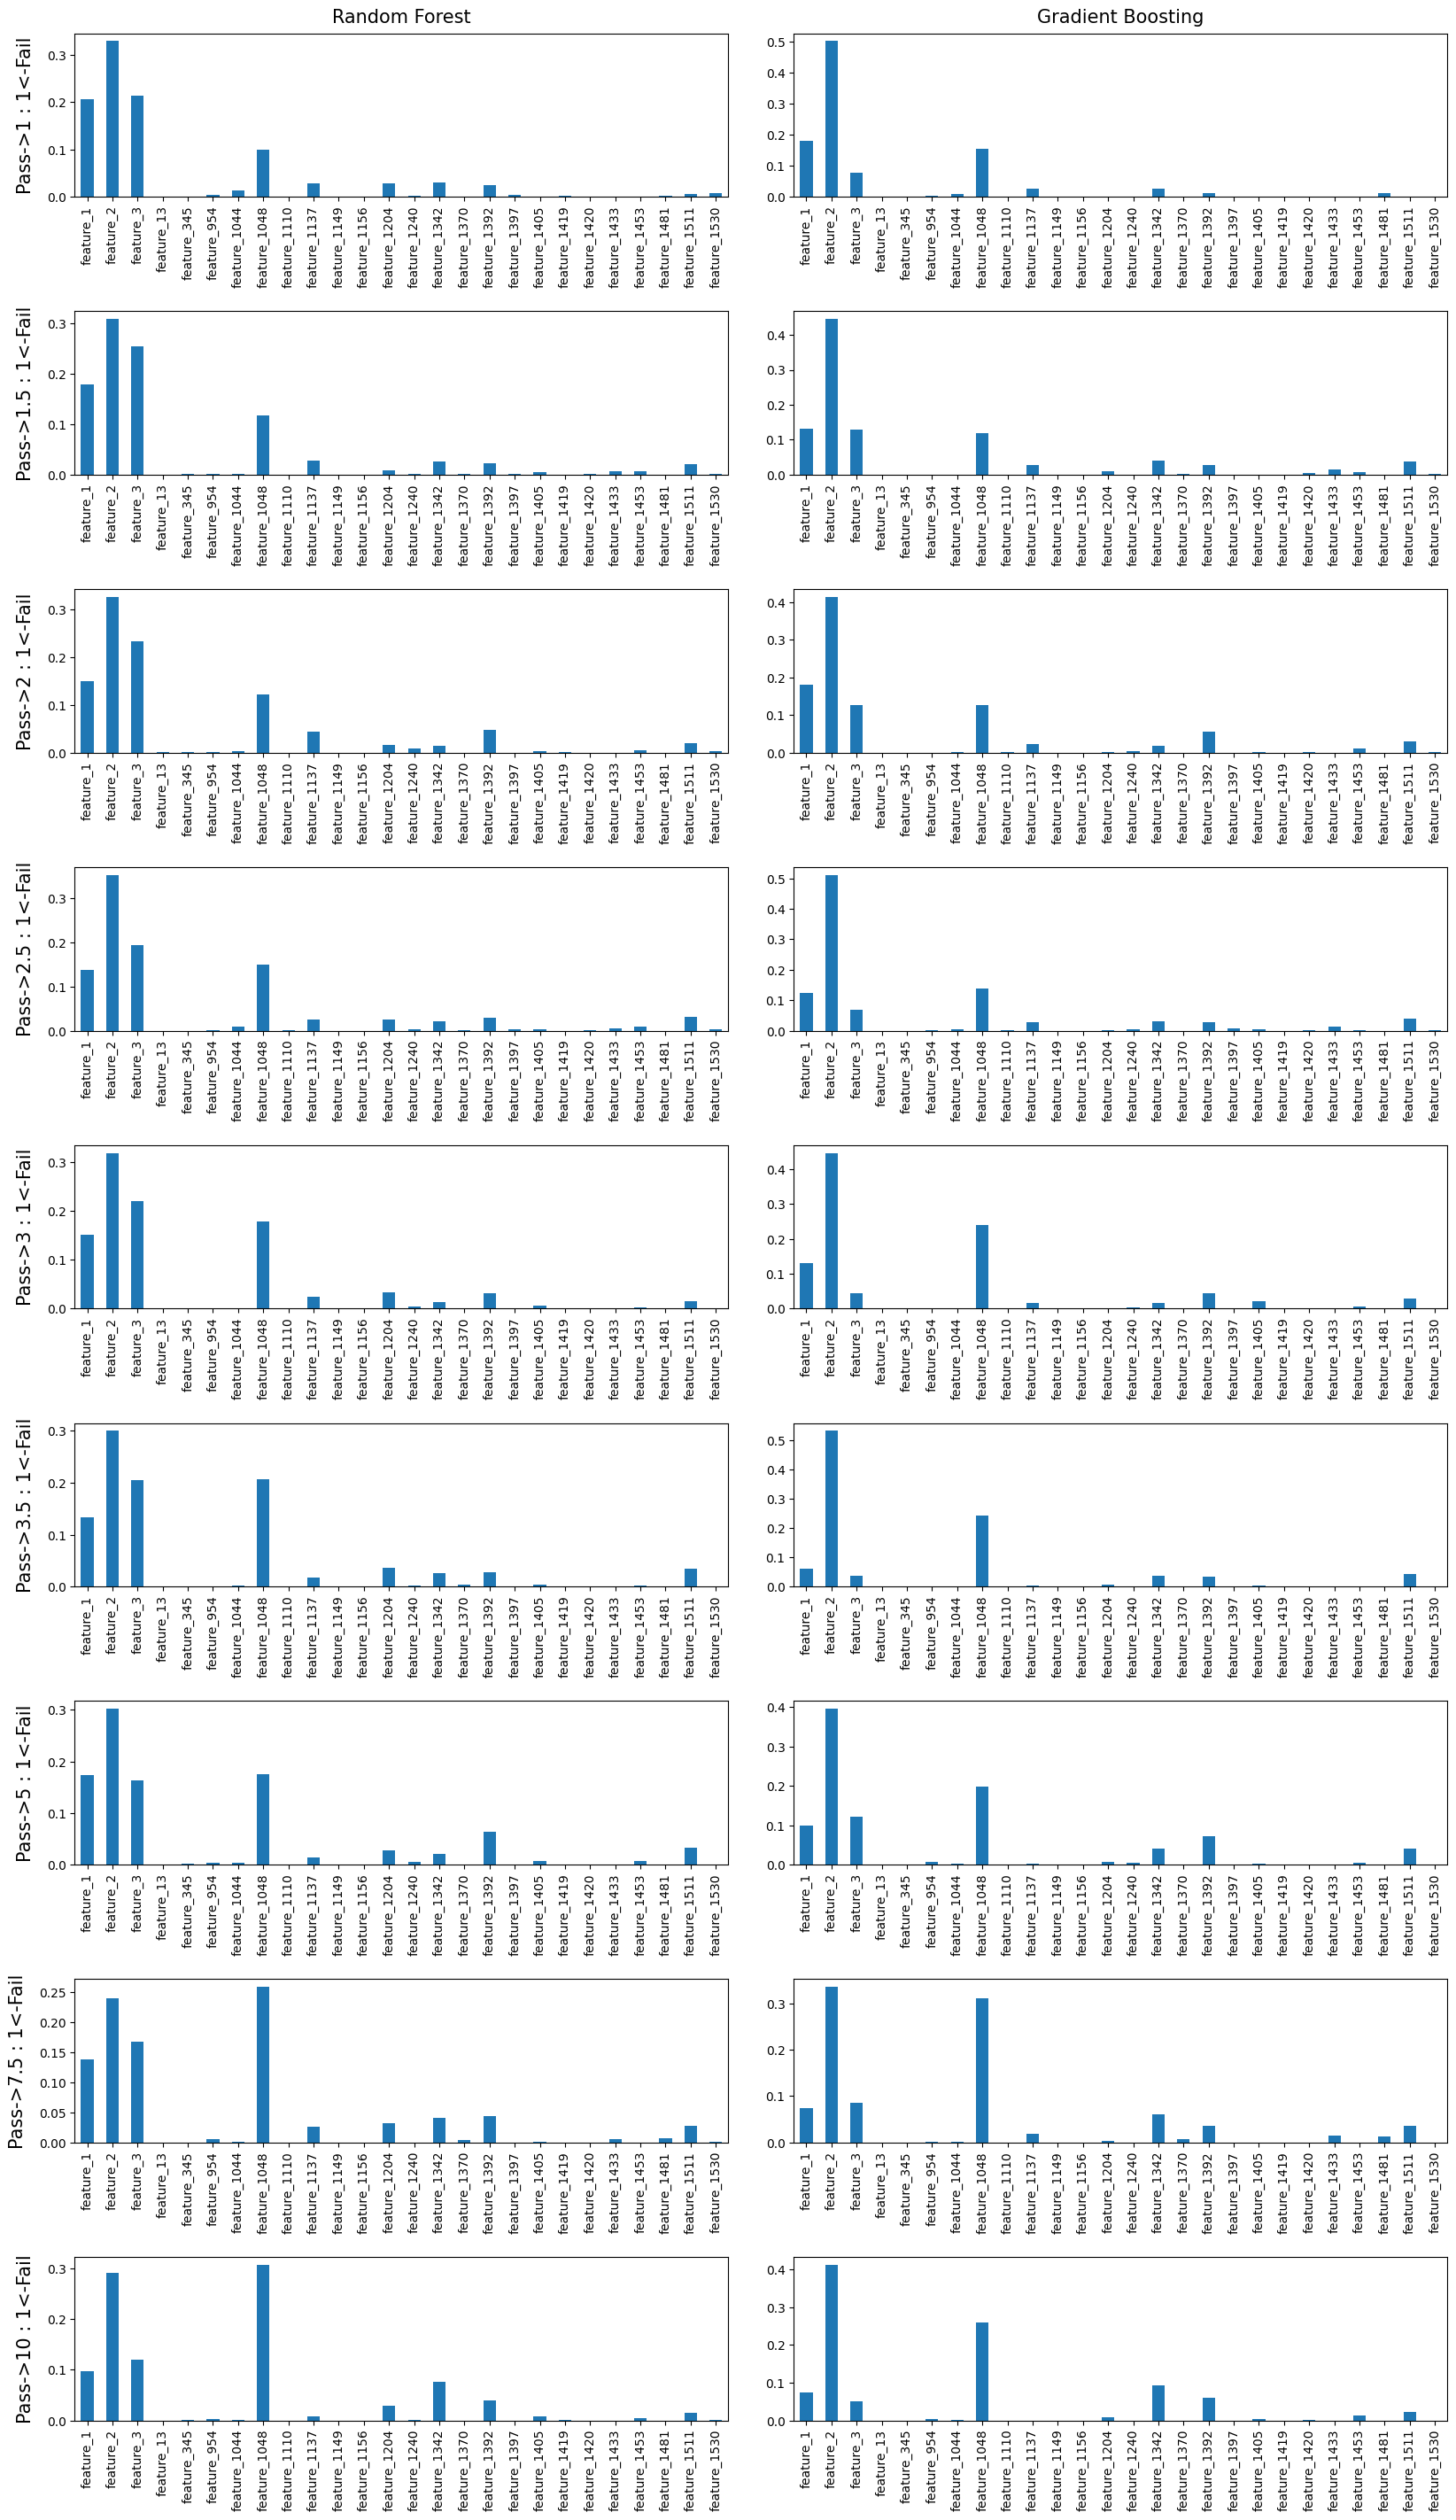

In [55]:
fig, ax = plt.subplots(9,2,figsize=(20,35))
plt.subplots_adjust(hspace=0.7, wspace=0.1)

for i in range(len(size)):
    
    rf = best_estimator_per_size[i][4]
    gb = best_estimator_per_size[i][5]
    
    best_model = [rf,gb]
    for j in range(2):        
        feature_importances = pd.Series(best_model[j].feature_importances_,
                                        data_for_predictions.columns[:-1])#.sort_values(ascending=True)

        feature_importances.plot(kind='bar', fontsize=10, ax=ax[i,j])
        
        if j==0:
            ax[i,j].set_ylabel('Pass->%s : 1<-Fail' %(size[i]), labelpad=10, fontsize=15)
        
ax[0,0].set_title('Random Forest', y=1.02, fontsize=15)
ax[0,1].set_title('Gradient Boosting', y=1.02, fontsize=15);

In [56]:
searching_optimal_f1, store_algorithm = [], []
for algorithm_name, results in algorithms_results.items():
    searching_optimal_f1.append(results['F1-score'].values)
    
algorithm, exp_sample = np.where(np.array(searching_optimal_f1)==np.array(searching_optimal_f1).max())

best_model_method_2 = best_estimator_per_size[exp_sample[0]][algorithm[0]]
best_model_method_2

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=9)

In [57]:
print('The best estimator is given by %s.' %best_model_method_2)
print()
print('The ratio is Class Pass -> %s : 1 <- Class Fail' %size[exp_sample[0]])

The best estimator is given by GradientBoostingClassifier(max_depth=4, max_leaf_nodes=9).

The ratio is Class Pass -> 7.5 : 1 <- Class Fail


In [58]:
predictions_method_2 = best_model_method_2.predict(data_for_predictions.iloc[:,:-1])
data_method_predictions["Pred. Method 2"] = predictions_method_2

In [59]:
row_of_columns = data_for_predictions[data_for_predictions.columns[:-1]].corrwith(data_for_predictions.Class, method='kendall').sort_values(ascending=False).index.tolist()
row_of_columns

['feature_1048',
 'feature_2',
 'feature_1204',
 'feature_1392',
 'feature_3',
 'feature_1342',
 'feature_1511',
 'feature_1',
 'feature_1405',
 'feature_1453',
 'feature_1370',
 'feature_1240',
 'feature_1156',
 'feature_954',
 'feature_1149',
 'feature_1397',
 'feature_1420',
 'feature_1110',
 'feature_1481',
 'feature_345',
 'feature_1419',
 'feature_13',
 'feature_1433',
 'feature_1530',
 'feature_1044',
 'feature_1137']

In [60]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=len(data_for_predictions[row_of_columns]))
fa.fit_transform(data_for_predictions[row_of_columns])

array([[ 0.07270904, -0.3500975 , -0.15344988, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63152488,  0.26384258, -0.60607979, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04152777, -0.35491067, -0.14272844, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.23993697, -0.2725738 , -0.19494719, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14408734,  0.16878662,  0.06980394, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44246246, -0.82040269, -0.15803061, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
m = fa.components_

m1 = m**2
m2 = np.sum(m1,axis=1)

components_var = []
for i in range(len(m2)):
    components_var.append((m2[i]*100)/np.sum(m2))

In [62]:
components_distr_features = pd.Series(components_var, index=row_of_columns).sort_values(ascending=False)
components_distr_features

feature_1048    36.171794
feature_2       31.360822
feature_1392    16.555616
feature_1204    10.110742
feature_3        2.649714
feature_1342     0.924589
feature_1511     0.915961
feature_1        0.634022
feature_1405     0.239875
feature_1453     0.137076
feature_1370     0.126270
feature_1240     0.057310
feature_1156     0.045816
feature_954      0.032289
feature_1149     0.021241
feature_1397     0.015949
feature_1420     0.000915
feature_1110     0.000000
feature_1481     0.000000
feature_345      0.000000
feature_1419     0.000000
feature_13       0.000000
feature_1433     0.000000
feature_1530     0.000000
feature_1044     0.000000
feature_1137     0.000000
dtype: float64

In [63]:
cumulative_distributions = []
for i, x in enumerate(components_distr_features.values):
    summa = np.array(components_distr_features.values[:i+1]).sum()
    cumulative_distributions.append(summa)

In [64]:
cumulative_distributions

[36.171793851504134,
 67.5326154832853,
 84.08823178461745,
 94.19897409825592,
 96.84868812952834,
 97.77327696590743,
 98.68923779186446,
 99.32325935292496,
 99.56313456748758,
 99.70021087384026,
 99.82648067081278,
 99.88379092107678,
 99.92960732274898,
 99.96189592270649,
 99.98313656758684,
 99.99908520585747,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.00000000000001,
 100.00000000000001,
 100.00000000000001]

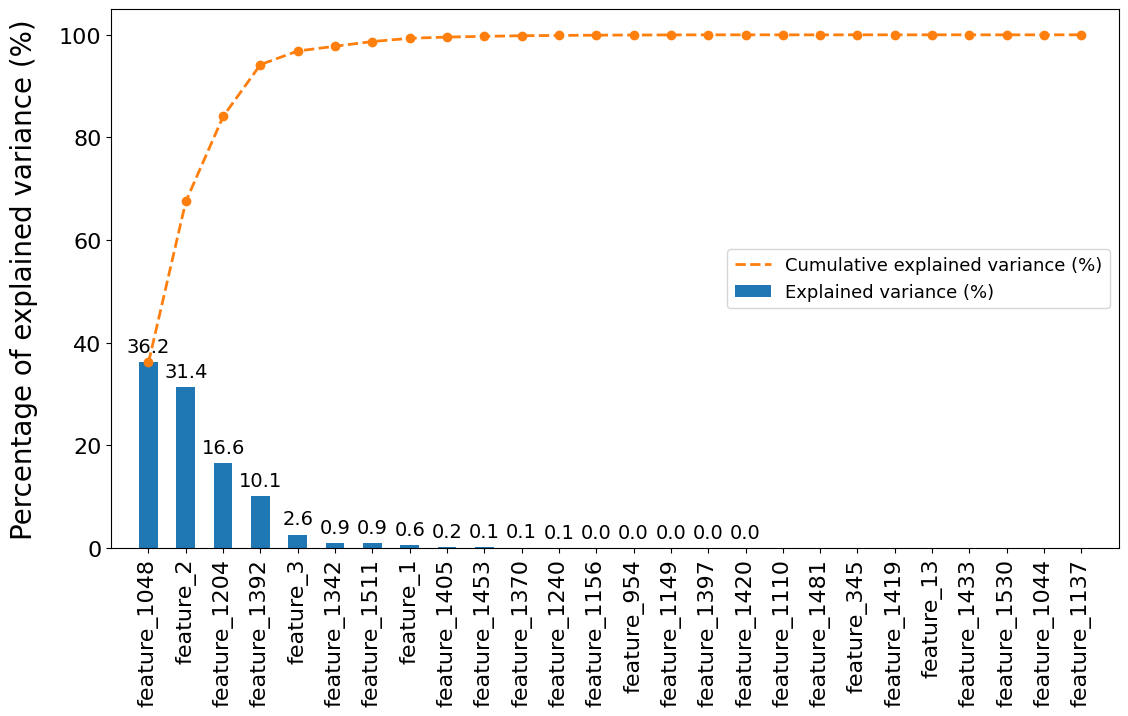

In [65]:
fig, ax = plt.subplots(1,1,figsize=(13,7))

pos = np.arange(len(cumulative_distributions))
components_distr_features.plot.bar(ax=ax, width=0.5, color='tab:blue', label='Explained variance (%)')
ax.plot(pos, cumulative_distributions, color='tab:orange', ls='--', 
        linewidth=2, label='Cumulative explained variance (%)')
ax.scatter(pos, cumulative_distributions, color='tab:orange')

ax.legend(loc='center right', fontsize=13)

ax.set_xlim(-1,len(row_of_columns))
ax.set_xticks(pos)
ax.set_xticklabels(row_of_columns, fontsize=16, rotation=90)
yticks = np.arange(0,120,20)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=16)

ax.set_ylabel('Percentage of explained variance (%)', fontsize=20, labelpad=15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height!=0:
        ax.text(x+width-0.25, y+height+3, '{:.1f}'.format(height), 
                horizontalalignment='center', verticalalignment='center', fontsize=14);

In [66]:
number_of_components = 1
summa = 0
i = 0
while summa<80:
    summa = summa + cumulative_distributions[i]
    i+=1
    
number_of_components = number_of_components + i

print('I must use %s components.' %number_of_components)

I must use 3 components.


In [67]:
fa = FactorAnalysis(n_components=number_of_components)
X_fa = fa.fit_transform(data_for_predictions[row_of_columns])

data_fa = pd.DataFrame(X_fa, columns=["Component_%s" %i for i in range(1,number_of_components+1)])
data_fa['Class'] = data_for_predictions.Class
data_fa

,Component_1,Component_2,Component_3,Class
0,0.144000,-0.718679,-0.174838,0
1,-0.093014,0.473372,-0.171275,0
2,0.081656,-0.710282,-0.166311,0
3,-0.688154,-0.074959,0.030982,0
4,1.577287,2.317222,-0.438967,0
...,...,...,...,...
1710,-0.921735,0.480690,0.114562,0
1711,0.454684,0.278949,-0.132857,0
1712,0.494875,-0.645119,-0.205464,0
1713,-0.241380,0.634526,-0.029224,0


In [68]:
X, y = data_fa.iloc[:,:-1], data_fa.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
parameters = {'penalty':['l1','l2'],
              'C': [0.001, 0.01, 0.1, 1]}
# Logistic Regression
GD_LR = GridSearchCV(LogisticRegression(solver='liblinear'),
                        param_grid=parameters, 
                        scoring='f1')

#Decision Trees
parameters = {'max_leaf_nodes': [i for i in range(2,10)],
              'max_depth': [i for i in range(2,10)]}
    
GD_DT = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Extra Trees
GD_ET = GridSearchCV(ExtraTreesClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Random Forest
GD_RF = GridSearchCV(RandomForestClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Gradient Boosting
GD_GB = GridSearchCV(GradientBoostingClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#k-NN
parameters = {'n_neighbors': [i for i in range(5,35,5)]}
GD_kNN = GridSearchCV(KNeighborsClassifier(),
                      param_grid=parameters, 
                      scoring='f1')


models = {'Logistic_Regression': GD_LR,
          'kNN': GD_kNN,
          'Decision_Trees': GD_DT,
          'Extra_Trees': GD_ET,
          'Random_Forest': GD_RF,
          'Gradient_Boosting': GD_GB}

In [70]:
results_col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC', 'F1-score']
results = pd.DataFrame(columns=results_col)

l = 0

accuracy_models_opt, precision_models_opt, recall_models_opt = [], [], []
roc_auc_models_opt, f1_score_models_opt = [], []
best_estimator = {}

for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    
    accuracy = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='accuracy')
    accuracy_models_opt.append(accuracy)    
    precision = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='precision')
    precision_models_opt.append(precision)
    recall = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='recall')
    recall_models_opt.append(recall)
    roc_auc = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='roc_auc')
    roc_auc_models_opt.append(roc_auc)
    f1 = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='f1')
    f1_score_models_opt.append(roc_auc)
    
    best_estimator[name] = model.best_estimator_
    
    results.loc[l] = [name,
                      '%s $\pm$ %s' %(round(accuracy.mean()*100,2),round(accuracy.std()*100,2)),
                      '%s $\pm$ %s' %(round(precision.mean()*100,2),round(precision.std()*100,2)),
                      '%s $\pm$ %s' %(round(recall.mean()*100,2),round(recall.std()*100,2)),
                      '%s $\pm$ %s' %(round(roc_auc.mean()*100,2),round(roc_auc.std()*100,2)),
                      '%s $\pm$ %s' %(round(f1.mean()*100,2),round(f1.std()*100,2))]
    l += 1

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting


In [72]:
results = results.sort_values(by='ROC-AUC', ascending=False)

In [71]:
results

,Classifier,Accuracy,Precision,Recall,ROC-AUC,F1-score
0,Logistic_Regression,91.78 $\pm$ 0.92,56.33 $\pm$ 23.73,14.05 $\pm$ 5.61,77.72 $\pm$ 7.47,22.03 $\pm$ 8.49
1,kNN,92.13 $\pm$ 1.24,55.78 $\pm$ 15.57,35.62 $\pm$ 14.38,85.31 $\pm$ 6.16,41.82 $\pm$ 12.01
2,Decision_Trees,90.73 $\pm$ 1.29,46.22 $\pm$ 5.7,61.48 $\pm$ 9.04,78.0 $\pm$ 4.02,52.57 $\pm$ 6.26
3,Extra_Trees,90.03 $\pm$ 1.54,42.77 $\pm$ 5.97,65.0 $\pm$ 8.29,78.09 $\pm$ 6.97,52.4 $\pm$ 6.91
4,Random_Forest,90.55 $\pm$ 1.53,46.13 $\pm$ 6.09,62.9 $\pm$ 8.8,84.54 $\pm$ 4.23,53.38 $\pm$ 6.48
5,Gradient_Boosting,91.95 $\pm$ 1.5,54.93 $\pm$ 20.13,28.0 $\pm$ 13.14,86.95 $\pm$ 3.02,35.69 $\pm$ 14.21


In [73]:
metrics_used = ['Accuracy', 'Precision', 'Recall', 'F1-score']

specific_models = []

for x in metrics_used:
    which_algorith = results.sort_values(x, ascending=False).iloc[0,0]
    if x!='Accuracy':
        if which_algorith in specific_models:
            i=1
            while which_algorith in specific_models:
                which_algorith = results.sort_values(x, ascending=False).iloc[i,0]
                if which_algorith in specific_models:
                    i+=1
                else:
                    specific_models.append(which_algorith)
                    break
        else:
            specific_models.append(which_algorith)
    else:
        specific_models.append(which_algorith)
        

specific_models

['kNN', 'Logistic_Regression', 'Extra_Trees', 'Random_Forest']

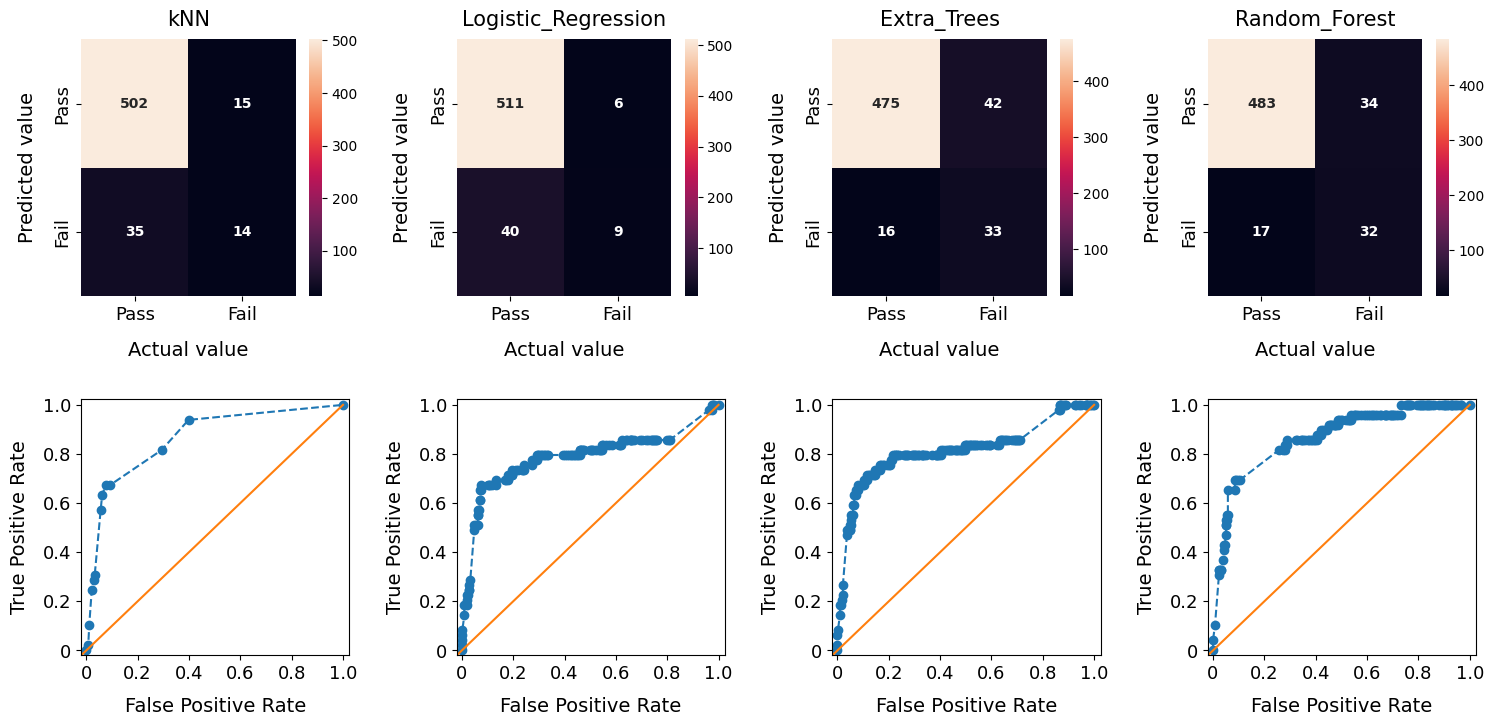

In [74]:
fig, ax = plt.subplots(2, 4, figsize=(18,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                         Confusion Matrix                                            #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################

i = 0
for name in specific_models:
    y_pred = models[name].best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)

    sns.heatmap(cm, annot=True, annot_kws={"size": 10, "weight": "bold"}, fmt='g', ax=ax[0,i])
    
    ticks=['Pass', 'Fail']
    ax[0,i].set_yticklabels(ticks, fontsize=13)
    ax[0,i].set_xticklabels(ticks, fontsize=13)
    ax[0,i].set_xlabel('Actual value', labelpad=12, fontsize=14)
    ax[0,i].set_ylabel('Predicted value', labelpad=12, fontsize=14)
    
    ax[0,i].set_title(specific_models[i], y=1.02, fontsize=15)
    i+=1

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                           ROC curve                                                 #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################


i = 0
for name in specific_models:
    probs = models[name].best_estimator_.predict_proba(X_test) 
    probs = probs[:, 1] 
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, probs)
    
    ax[1,i].plot(rf_fpr, rf_tpr, '--o')
    ax[1,i].plot([-0.02,1.],[-0.02,1.], '-')
    
    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    ax[1,i].set_xticks(ticks)
    ax[1,i].set_xticklabels(ticks, fontsize=13)

    ax[1,i].set_yticks(ticks)
    ax[1,i].set_yticklabels(ticks, fontsize=13)

    ax[1,i].set_xlim(-0.02,1.025)
    ax[1,i].set_ylim(-0.02,1.025)

    ax[1,i].set_xlabel('False Positive Rate', fontsize=14, labelpad=10)
    ax[1,i].set_ylabel('True Positive Rate', fontsize=14, labelpad=10)
    
    i+=1;

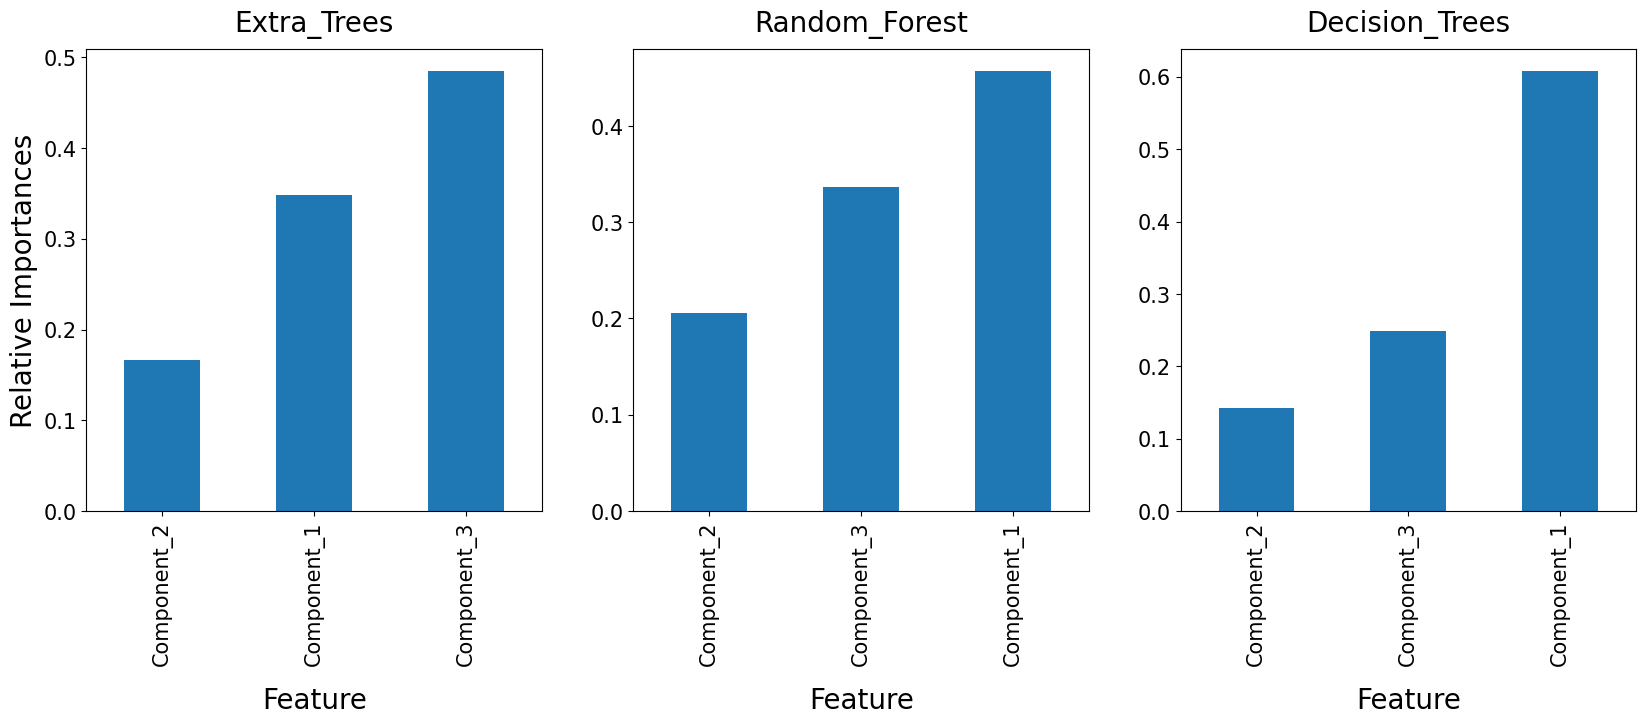

In [75]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

for i, name in enumerate(['Extra_Trees','Random_Forest','Decision_Trees']):
    best_model = models[name].best_estimator_
    feature_importances = pd.Series(best_model.feature_importances_,
                                    data_fa.columns[:-1]).sort_values(ascending=True)

    feature_importances.plot(kind='bar', fontsize=15, ax=ax[i])
    ax[i].set_xlabel('Feature', labelpad=15, fontsize=20)
    ax[i].set_title(name, y=1.02, fontsize=20)
    if i==0:
        ax[i].set_ylabel('Relative Importances', fontsize=20);

In [76]:
which_algorithm = results[results['F1-score']==results['F1-score'].max()]['Classifier']
best_model_method_3 = best_estimator[which_algorithm.values[0]]

results[results['F1-score']==results['F1-score'].max()]

,Classifier,Accuracy,Precision,Recall,ROC-AUC,F1-score
4,Random_Forest,90.55 $\pm$ 1.53,46.13 $\pm$ 6.09,62.9 $\pm$ 8.8,84.54 $\pm$ 4.23,53.38 $\pm$ 6.48


In [77]:
predictions_method_3 = best_model_method_3.predict(X)
data_method_predictions["Pred. Method 3"] = predictions_without_weights

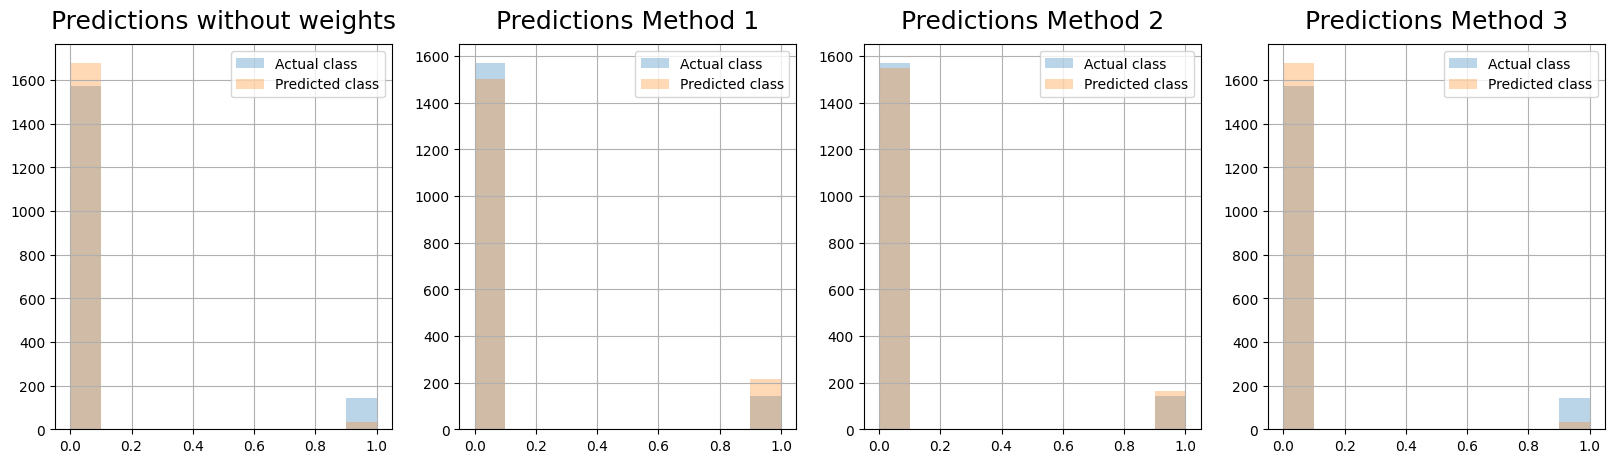

In [78]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

data_method_predictions.Class.hist(ax=ax[0], alpha=0.3, label='Actual class')
data_method_predictions['Pred. without weights'].hist(ax=ax[0], alpha=0.3, label='Predicted class')
ax[0].set_title('Predictions without weights', y=1.02, fontsize=18)
ax[0].legend()

data_method_predictions.Class.hist(ax=ax[1], alpha=0.3, label='Actual class')
data_method_predictions['Pred. Method 1'].hist(ax=ax[1], alpha=0.3, label='Predicted class')
ax[1].set_title('Predictions Method 1', y=1.02, fontsize=18)
ax[1].legend()

data_method_predictions.Class.hist(ax=ax[2], alpha=0.3, label='Actual class')
data_method_predictions['Pred. Method 2'].hist(ax=ax[2], alpha=0.3, label='Predicted class')
ax[2].set_title('Predictions Method 2', y=1.02, fontsize=18)
ax[2].legend()

data_method_predictions.Class.hist(ax=ax[3], alpha=0.3, label='Actual class')
data_method_predictions['Pred. Method 3'].hist(ax=ax[3], alpha=0.3, label='Predicted class')
ax[3].set_title('Predictions Method 3', y=1.02, fontsize=18)
ax[3].legend();

In [79]:
methods_analysis = data_method_predictions[['Class','Pred. without weights','Pred. Method 1',
                                            'Pred. Method 2','Pred. Method 3']]

In [80]:
columns = ['Pred. without weights','Pred. Method 1','Pred. Method 2', 'Pred. Method 3']

# count how many are in total with 0 and 1 in the variable Class
how_many_0 = methods_analysis[methods_analysis.Class==0]['Class'].count()
how_many_1 = methods_analysis[methods_analysis.Class==1]['Class'].count()

perc_mis_0_to_1_per_method, perc_mis_1_to_0_per_method = [], []

for x in columns:
    mis_0_to_1 = methods_analysis[(methods_analysis.Class==0) &
                                  (methods_analysis[x]==1)][x].count()
    mis_1_to_0 = methods_analysis[(methods_analysis.Class==1) &
                                (methods_analysis[x]==0)][x].count()

    perc_mis_0_to_1_per_method.append(round(mis_0_to_1/how_many_0*100,2))
    perc_mis_1_to_0_per_method.append(round(mis_1_to_0/how_many_1*100,2))
    
    
    correct_classified_0 = methods_analysis[(methods_analysis.Class==0) &
                                            (methods_analysis[x]==0)][x].count()
    correct_classified_1 = methods_analysis[(methods_analysis.Class==1) &
                                            (methods_analysis[x]==1)][x].count()
    
   
    print('For the column', x,':')
    print()
    print('Classified 0 but predicted to 1:', mis_0_to_1)
    print('Classified 1 but predicted to 0:', mis_1_to_0)
    print('-'*40)

For the column Pred. without weights :

Classified 0 but predicted to 1: 13
Classified 1 but predicted to 0: 121
----------------------------------------
For the column Pred. Method 1 :

Classified 0 but predicted to 1: 114
Classified 1 but predicted to 0: 42
----------------------------------------
For the column Pred. Method 2 :

Classified 0 but predicted to 1: 72
Classified 1 but predicted to 0: 49
----------------------------------------
For the column Pred. Method 3 :

Classified 0 but predicted to 1: 13
Classified 1 but predicted to 0: 121
----------------------------------------


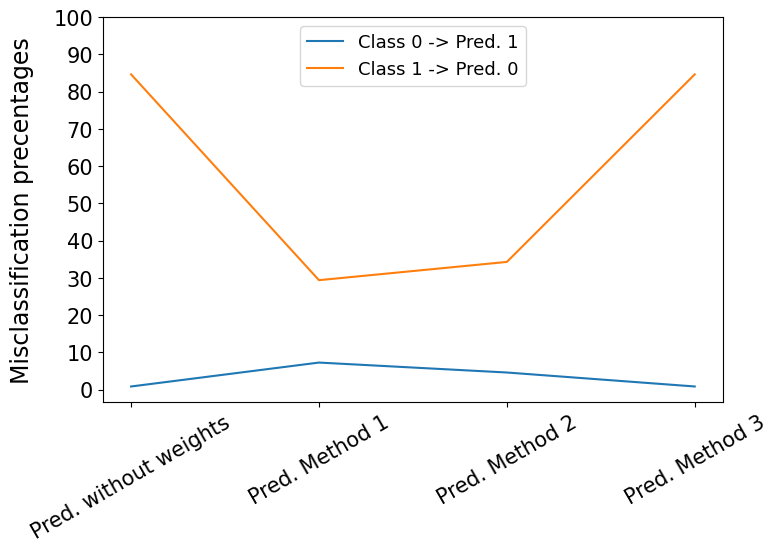

In [81]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

pos = np.arange(4)
ax.plot(pos, perc_mis_0_to_1_per_method, label='Class 0 -> Pred. 1')
ax.plot(pos, perc_mis_1_to_0_per_method, label='Class 1 -> Pred. 0')
ax.set_xticks(pos)
ax.set_xticklabels(columns, fontsize=15, rotation=30)
ax.set_yticks([i for i in range(0,110,10)])
ax.set_yticklabels([i for i in range(0,110,10)], fontsize=15)

ax.set_ylabel('Misclassification precentages', labelpad=14, fontsize=17)

ax.legend(loc='best', fontsize=13);